In [1]:
import pandas as pd
import matplotlib.pyplot as plt-
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Dell\Downloads\Python_Diwali_Sales_Analysis\Diwali Sales Data.csv' , encoding = 'latin-1')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
# check no. of rows and columns in the DataFrame
df.shape

(11251, 15)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
# check for the null values
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [10]:
df.shape

(0, 15)

In [42]:
 # drop the blank columns/ unrelated
df.dropna(inplace = True)

In [11]:
# check the columns in the given DataFrame
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [18]:
# rename the columns
df.rename(columns = {'Product_Category' : 'Product_Cat'}) 

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Cat,Orders,Amount,Status,unnamed1


In [19]:
# describe() returns the statistical description of the DataFrame (i.e. count , mean, median, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# use describe() for the seperate columns 
df[['Age' , 'Orders' , 'Amount']].describe()

,Age,Orders,Amount
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


# Exploraotry Data Analysis

In [21]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

## Gender

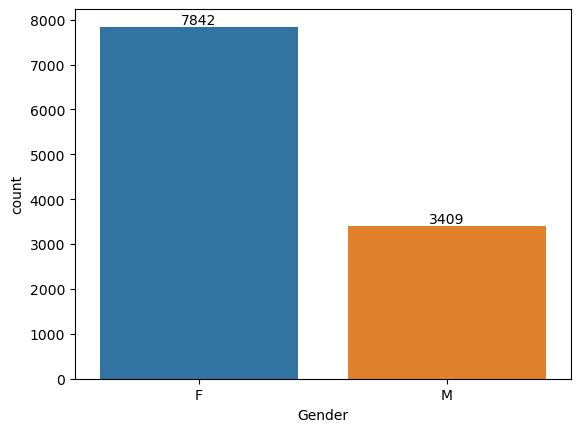

In [7]:
ax = sns.countplot(x = 'Gender', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

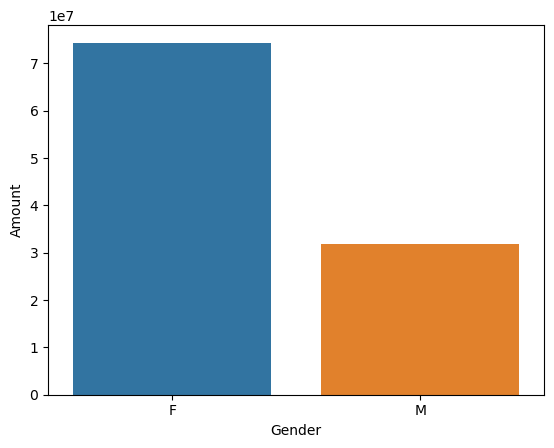

In [10]:
sales_gen = df.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by= 'Amount', ascending = False)

sns.barplot(x = 'Gender' , y = 'Amount' , data = sales_gen)

 #### From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men

## Age

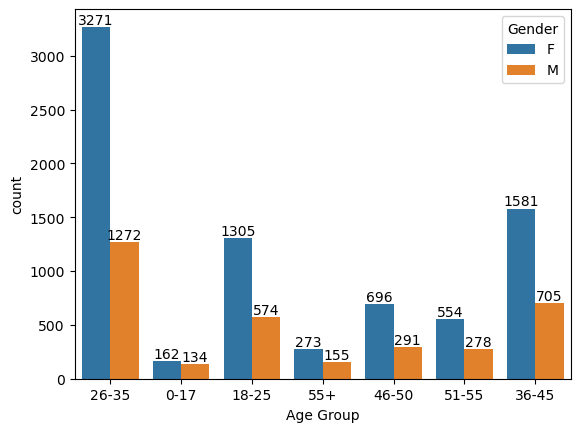

In [15]:
ax = sns.countplot(data = df , x =  'Age Group' , hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

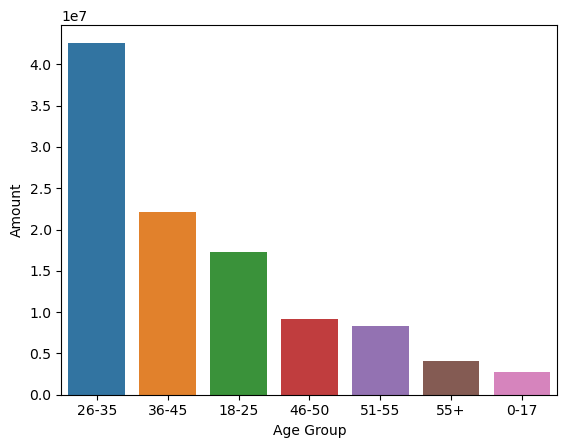

In [23]:
# total Amount vs Age groups

sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False)

sns.barplot(x = 'Age Group', y = 'Amount' , data = sales_age)

In [ ]:
from above graph we can see that most of the buyers are of age group between 26-35yrs female

## State

<Axes: xlabel='State', ylabel='Orders'>

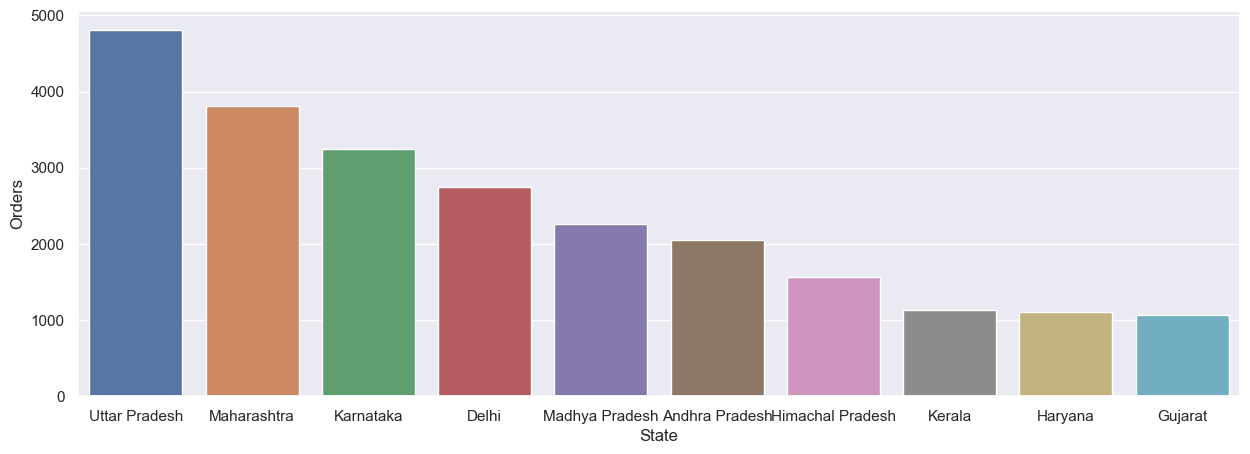

In [26]:
# total numbers of orders from top 10 states

sales_state = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = 'Orders' , ascending = False).head(10)

sns.set(rc = {'figure.figsize' : (15,5)})
sns.barplot(data = sales_state , x = 'State' , y = 'Orders')
                                                                                  

<Axes: xlabel='State', ylabel='Amount'>

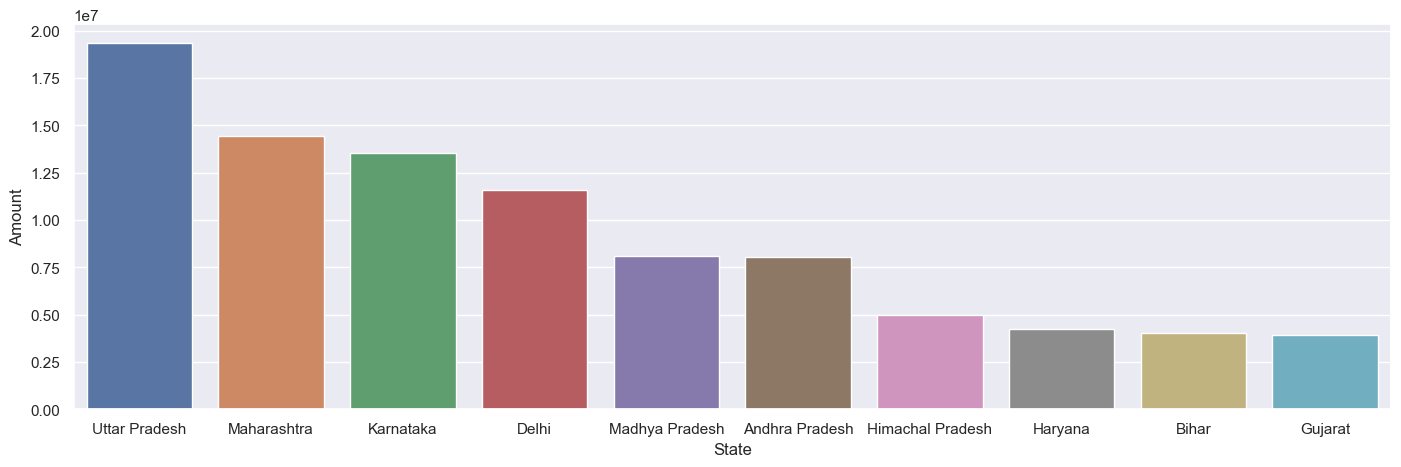

In [28]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False).head(10)

sns.set(rc = {'figure.figsize' : (17,5)})
sns.barplot(data = sales_state , x = 'State' , y = 'Amount')

In [ ]:
*from above graph we can see that most of the orders are from the Uttar Pradesh , Maharashtra and Karnatka respectively

## Marital_Status

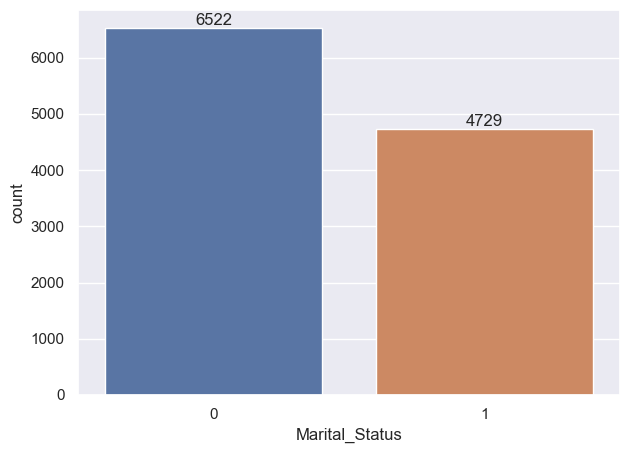

In [34]:
ax = sns.countplot(data = df  , x = 'Marital_Status')

sns.set(rc = {'figure.figsize' : (4,5)})
for bars in ax.containers:
    ax.bar_label(bars)
    

<Axes: xlabel='Marital_Status', ylabel='Amount'>

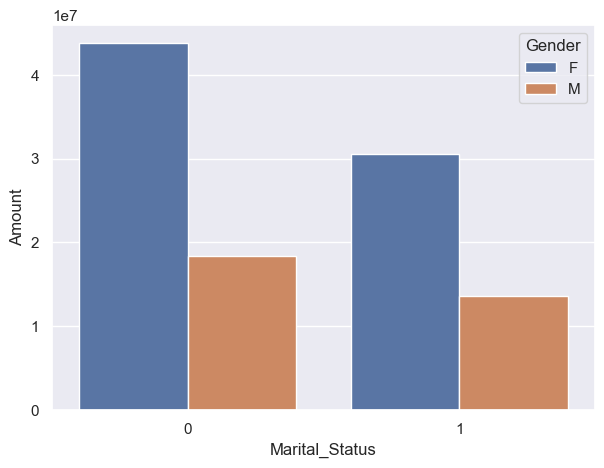

In [37]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False)

sns.set(rc = {'figure.figsize' : (7,5)})
sns.barplot(data = sales_state , x = 'Marital_Status' , y = 'Amount' , hue = 'Gender')

In [ ]:
From above graphs we can see that the most of the buyers are married(women) and they have high purchasing power

## Occupation

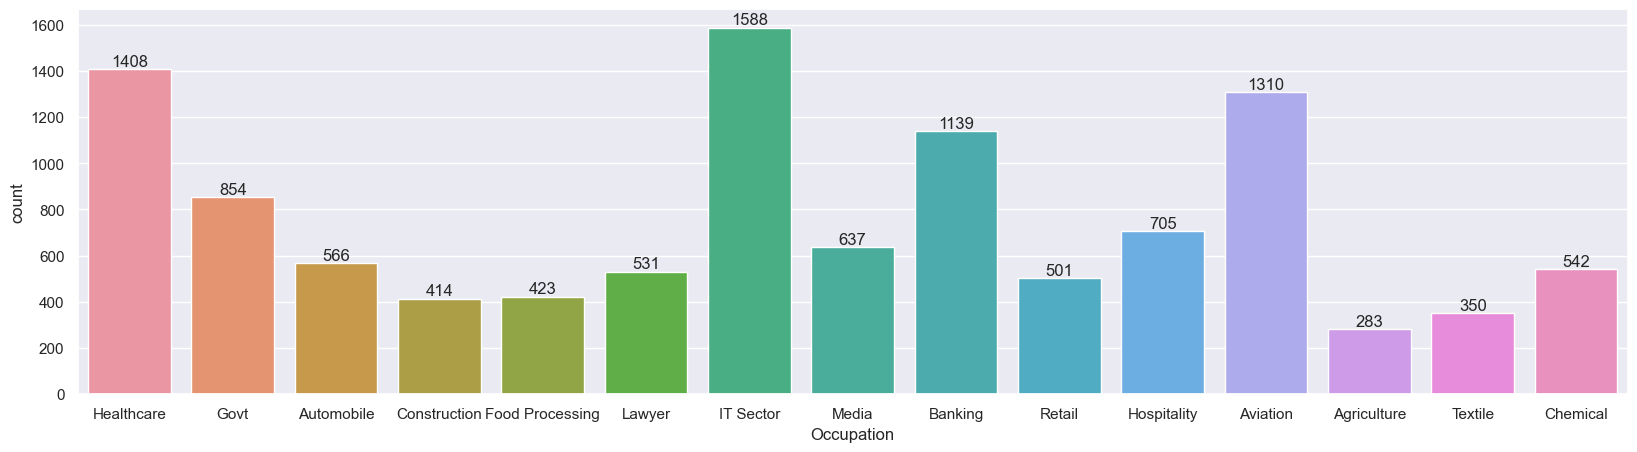

In [41]:
ax = sns.countplot(data = df , x = 'Occupation')

sns.set(rc = {'figure.figsize': (20,7)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

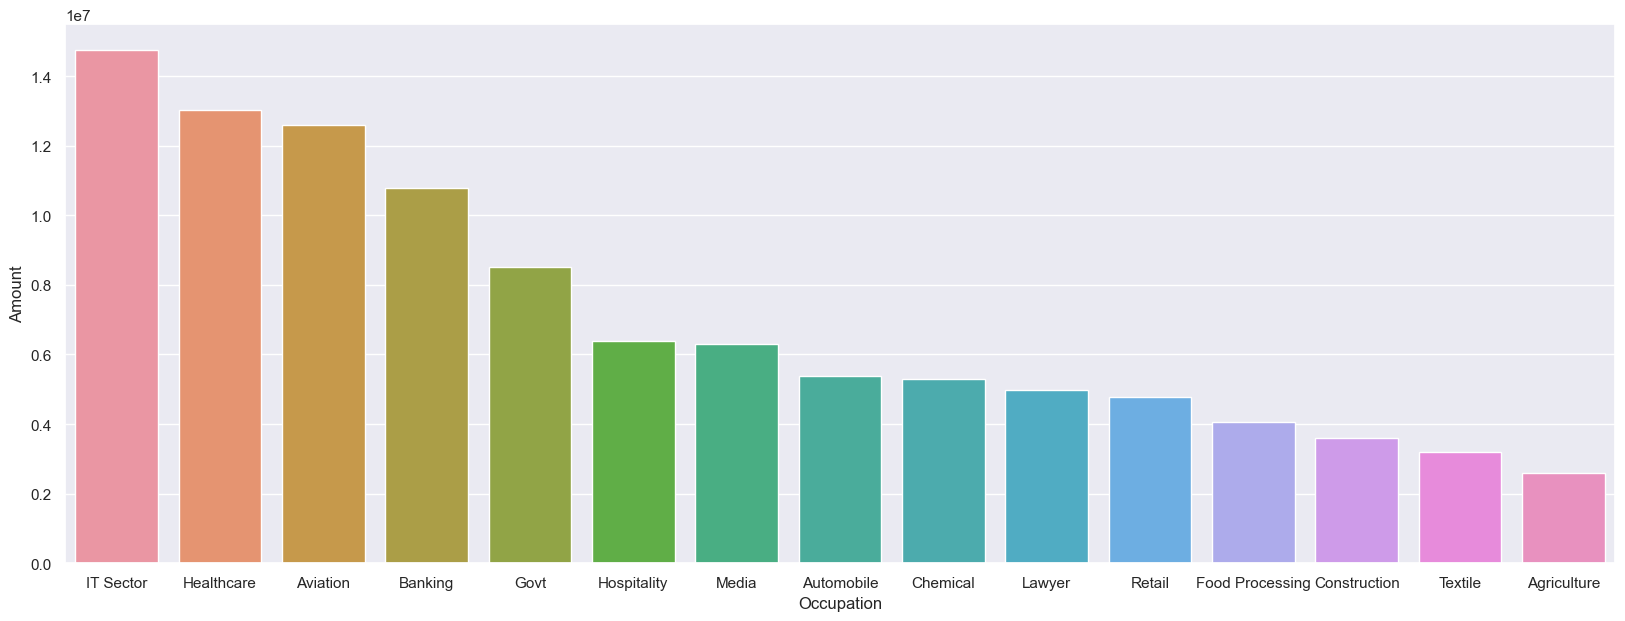

In [43]:
sales_state = df.groupby(['Occupation'], as_index = False) ['Amount'].sum().sort_values(by = 'Amount' , ascending = False)

sns.set(rc = {'figure.figsize' : (20,7)})
sns.barplot(data = sales_state , x = 'Occupation', y = 'Amount')

 ## From the abve graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector



## Product_Category

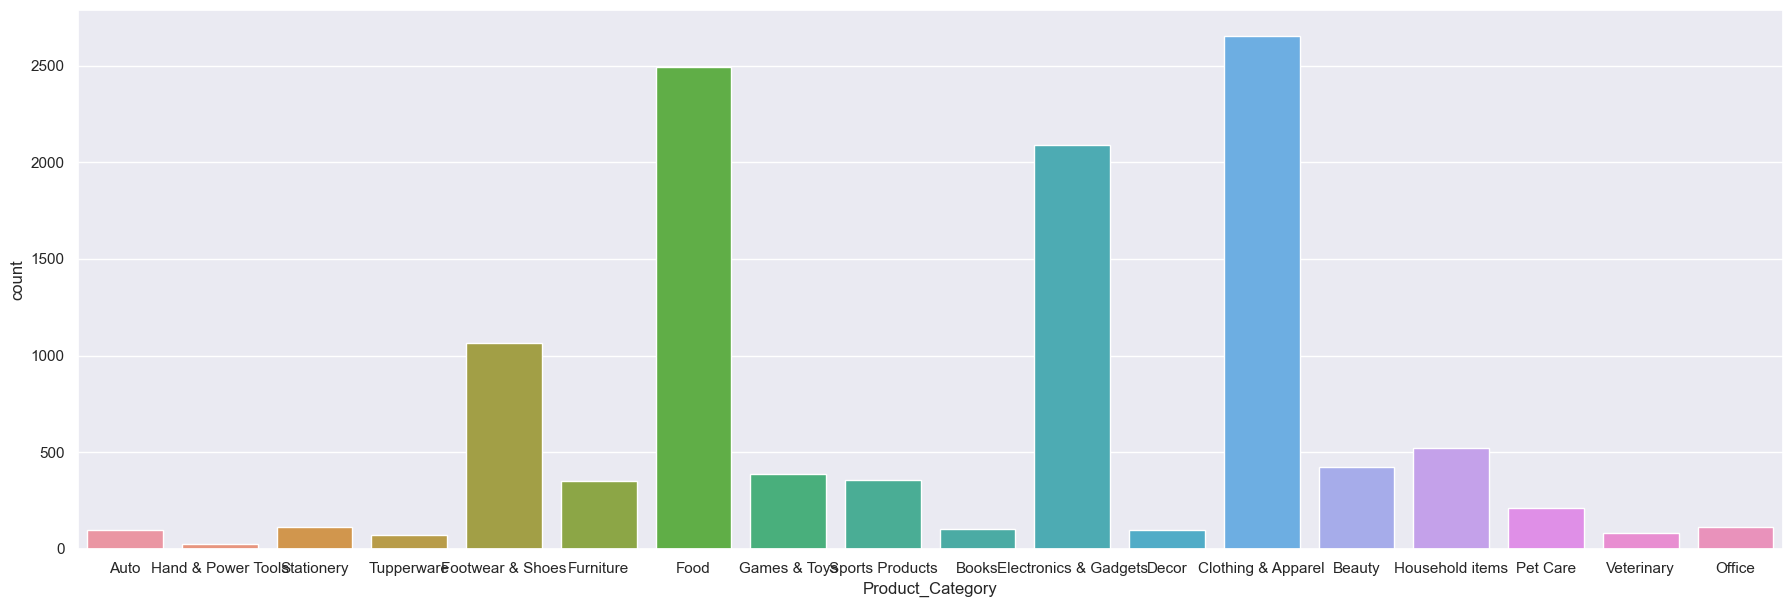

In [49]:
sns.countplot(data = df , x = 'Product_Category')
sns.set(rc = {'figure.figsize' : (22,9)})

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

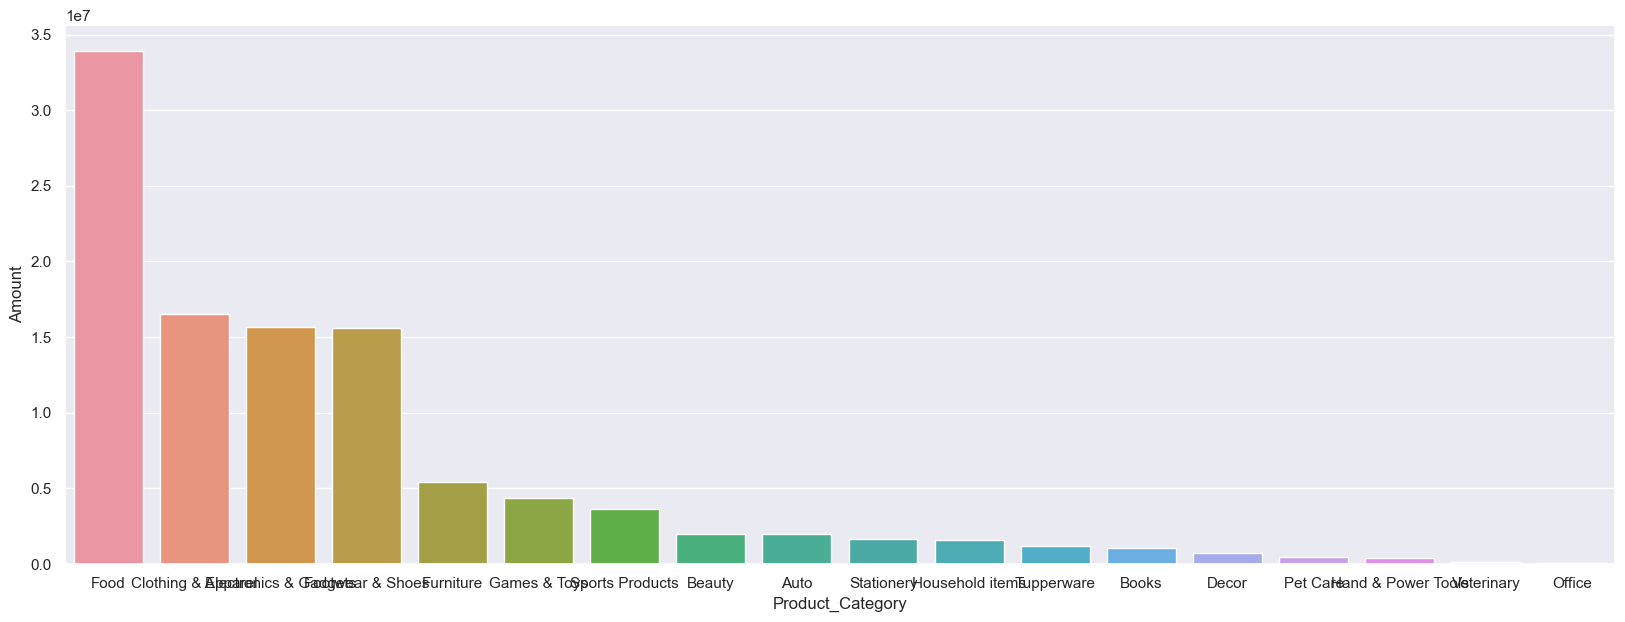

In [52]:
sales_state = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False)

sns.set(rc = {'figure.figsize': (20,7)})
sns.barplot(data = sales_state , x = 'Product_Category' , y = 'Amount')

 ## From the above graph we can se that most of the sold products are from Food, Clothing, and Electronic category

<Axes: xlabel='Product_Category', ylabel='Orders'>

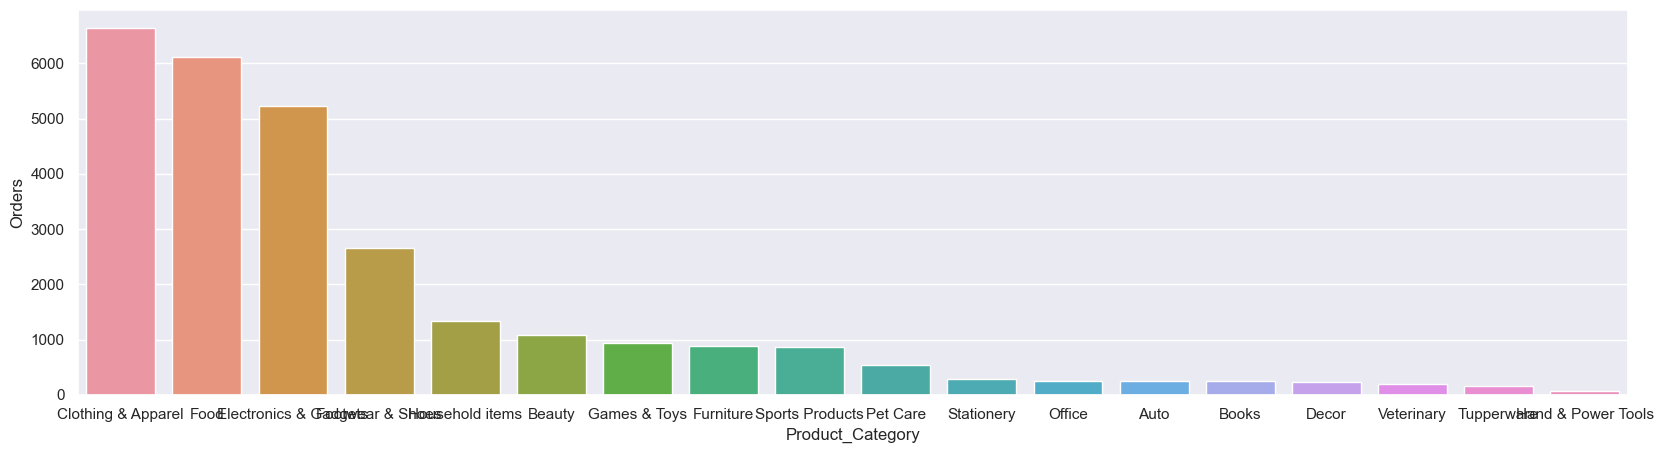

In [54]:
sales_state = df.groupby(['Product_Category'], as_index = False)['Orders'].sum().sort_values(by = 'Orders' , ascending = False)

sns.set(rc = {'figure.figsize' : (20,5)})
sns.barplot(data = sales_state , x = 'Product_Category' , y = 'Orders')

In [ ]:
# top 10 most sold products (same things as above)

fig1, ax1 = plt.subplots(figsize = (12,7))
df.groupby('Product_Category')['Orders'].sum().nlargest(10).sort_values(ascending = False).plot(kind = 'bar')

# Conclusion

# Married women age group 26-35yrs from UP, Maharashtra and Karnatka working in IT, Healthcare and Aviation are more likely to buy products from Food ,Clothing and Electronic category


